##**Why I Choose This data**:

**Context:**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Dataset Description:

| Variable   | Description                                                                                   |
|------------|-----------------------------------------------------------------------------------------------|
| age        | Age of the patient in years                                                                   |
| sex        | Gender of the patient (0 = male, 1 = female)                                                  |
| cp         | Chest pain type: 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic |
| trestbps   | Resting blood pressure in mm Hg                                                               |
| chol       | Serum cholesterol in mg/dl                                                                    |
| fbs        | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)               |
| restecg    | Resting electrocardiographic results: 0: Normal, 1: Having ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy |
| thalach    | Maximum heart rate achieved during a stress test                                              |
| exang      | Exercise-induced angina (1 = yes, 0 = no)                                                     |
| oldpeak    | ST depression induced by exercise relative to rest                                             |
| slope      | Slope of the peak exercise ST segment: 0: Upsloping, 1: Flat, 2: Downsloping                   |
| ca         | Number of major vessels (0-4) colored by fluoroscopy                                           |
| thal       | Thalium stress test result: 0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described |
| target     | Heart disease status (0 = no disease, 1 = presence of disease)                                 |

In [68]:
!pip install seaborn
!pip install catboost
import seaborn as sns
import numpy as np
import pandas as pd
from typing import Any, List, Dict, Tuple
from google.colab import files

import tqdm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score, roc_curve, f1_score, fbeta_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import seaborn as sns
sns.set(style="darkgrid")

from warnings import filterwarnings
filterwarnings('ignore')


Next, I'll delve into a detailed exploration of the dataset:

In [69]:
data = pd.read_csv('/content/Heart_disease_cleveland_new.csv')

In [70]:
print('Shape of the data is ', data.shape)
data.head()


Shape of the data is  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


**##Data Info**

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**We need to check for missing data and see if there is an appropriate way to fill it in.**

In [72]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Since there is no missing entries in the data . So we can easily move forward.

In [73]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


## Distribution of Heart disease on the basis of target

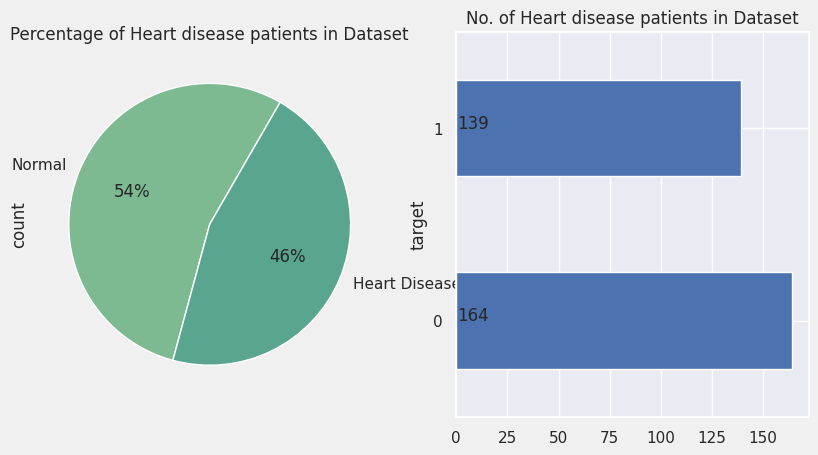

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5),facecolor=(.94, .94, .94))


ax1 = data['target'].value_counts().plot.pie( x ="Heart disease" ,y ='no.of patients',
                   autopct = "%1.0f%%",labels=["Normal","Heart Disease"], startangle = 60,ax=ax1,colors = sns.color_palette("crest"));
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = data["target"].value_counts().plot(kind="barh",ax =ax2)
for x,y in enumerate(data["target"].value_counts().values):
    ax2.text(.5,x,y,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()


##  Gender and Agewise Distribution

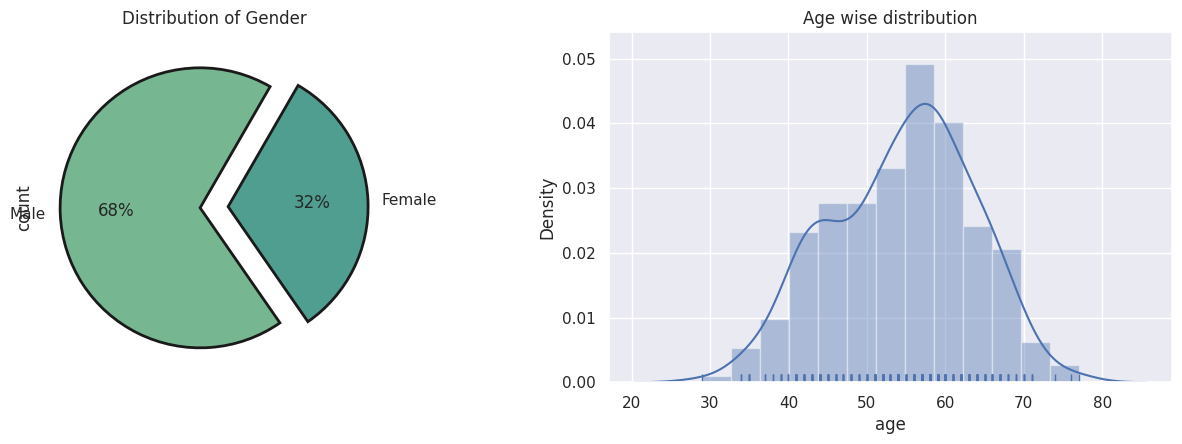

In [75]:
plt.figure(figsize=(16,10))
plt.subplot(221)
data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("crest",5), startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =False)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(data['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

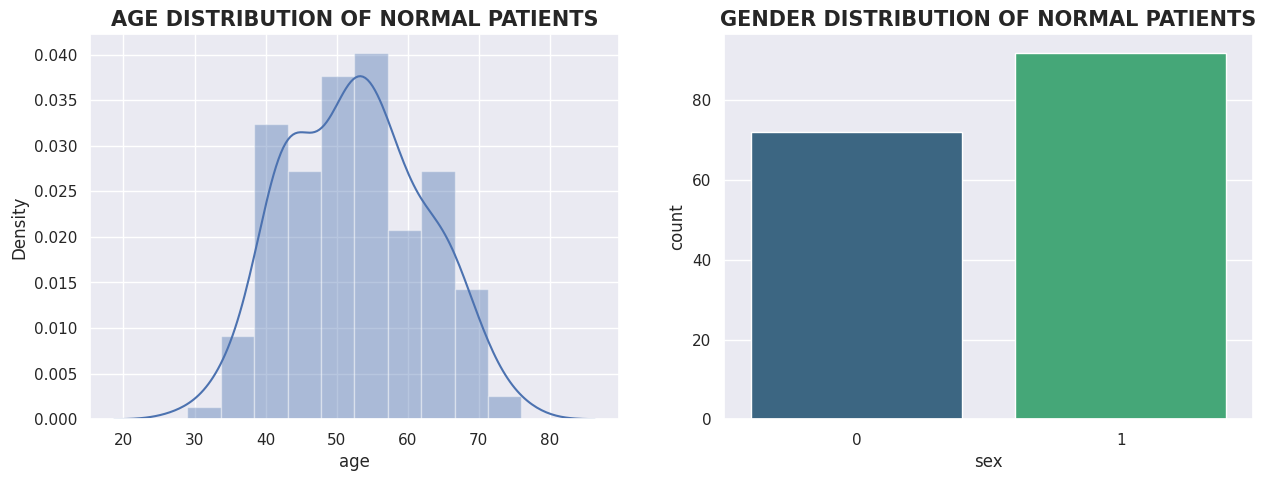

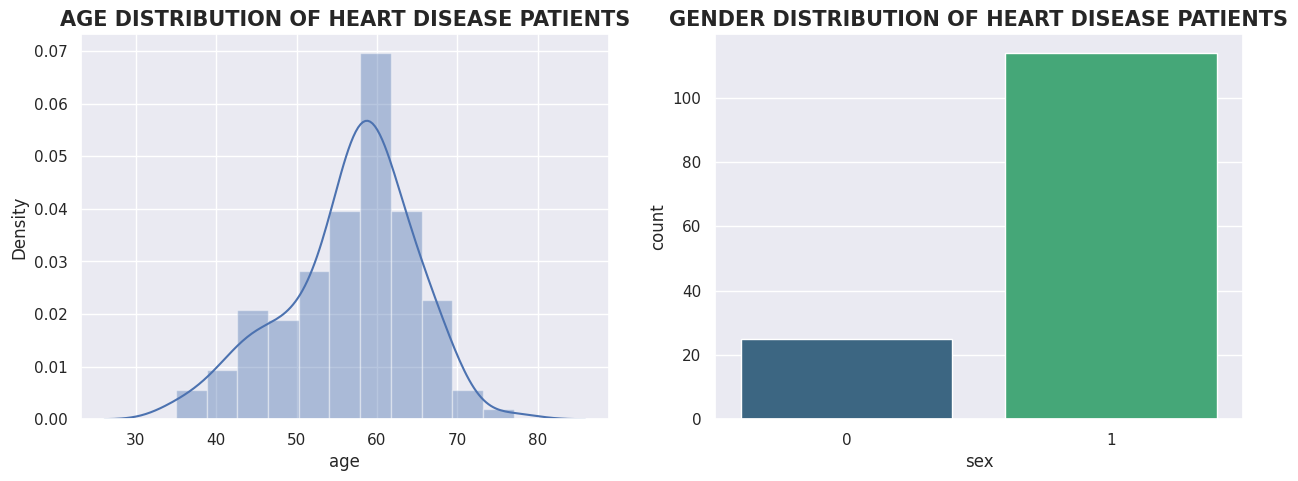

In [76]:
data_1=data[data['target']==1]

data_0=data[data['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(data_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =data_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(data_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x=data_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()


## Distribution of Chest Pain Type

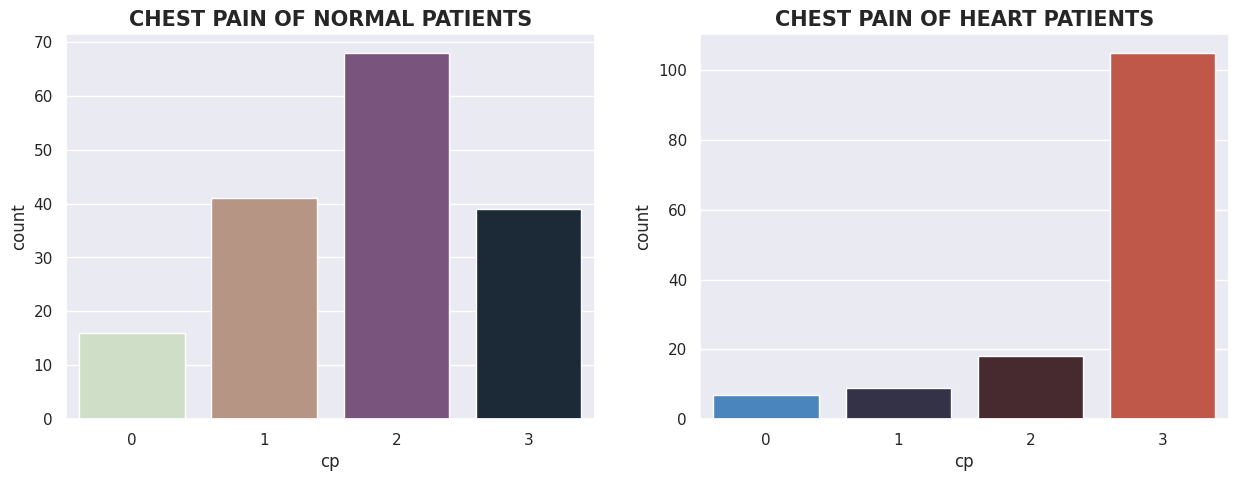

In [77]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =data_0['cp'],palette = 'ch:start=4.2,rot=-3.3')
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =data_1['cp'], palette='icefire')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [78]:
plot_criteria= ['cp', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
cp,,
0,9.760000,5.040000
1,25.000000,6.470000
2,41.460000,12.950000
3,23.780000,75.540000


In [79]:
# numerical fearures 6
num_feats = ['age', 'chol', 'restecg', 'thalach', 'oldpeak', 'ca']
# categorical (binary)
bin_feats = ['sex', 'fbs', 'exang', 'target']
# caterorical (multi-)
nom_feats= ['cp', 'restecg', 'slope', 'thal']
cat_feats = nom_feats + bin_feats

In [80]:
# Before the plotting loop, print the columns in your DataFrame:
print(data.columns)

# Check for any discrepancies with the 'cholesterol' column name.

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


## Distribution of Numerical features

In [81]:
X = data.drop(['target'],axis=1)
y = data['target']

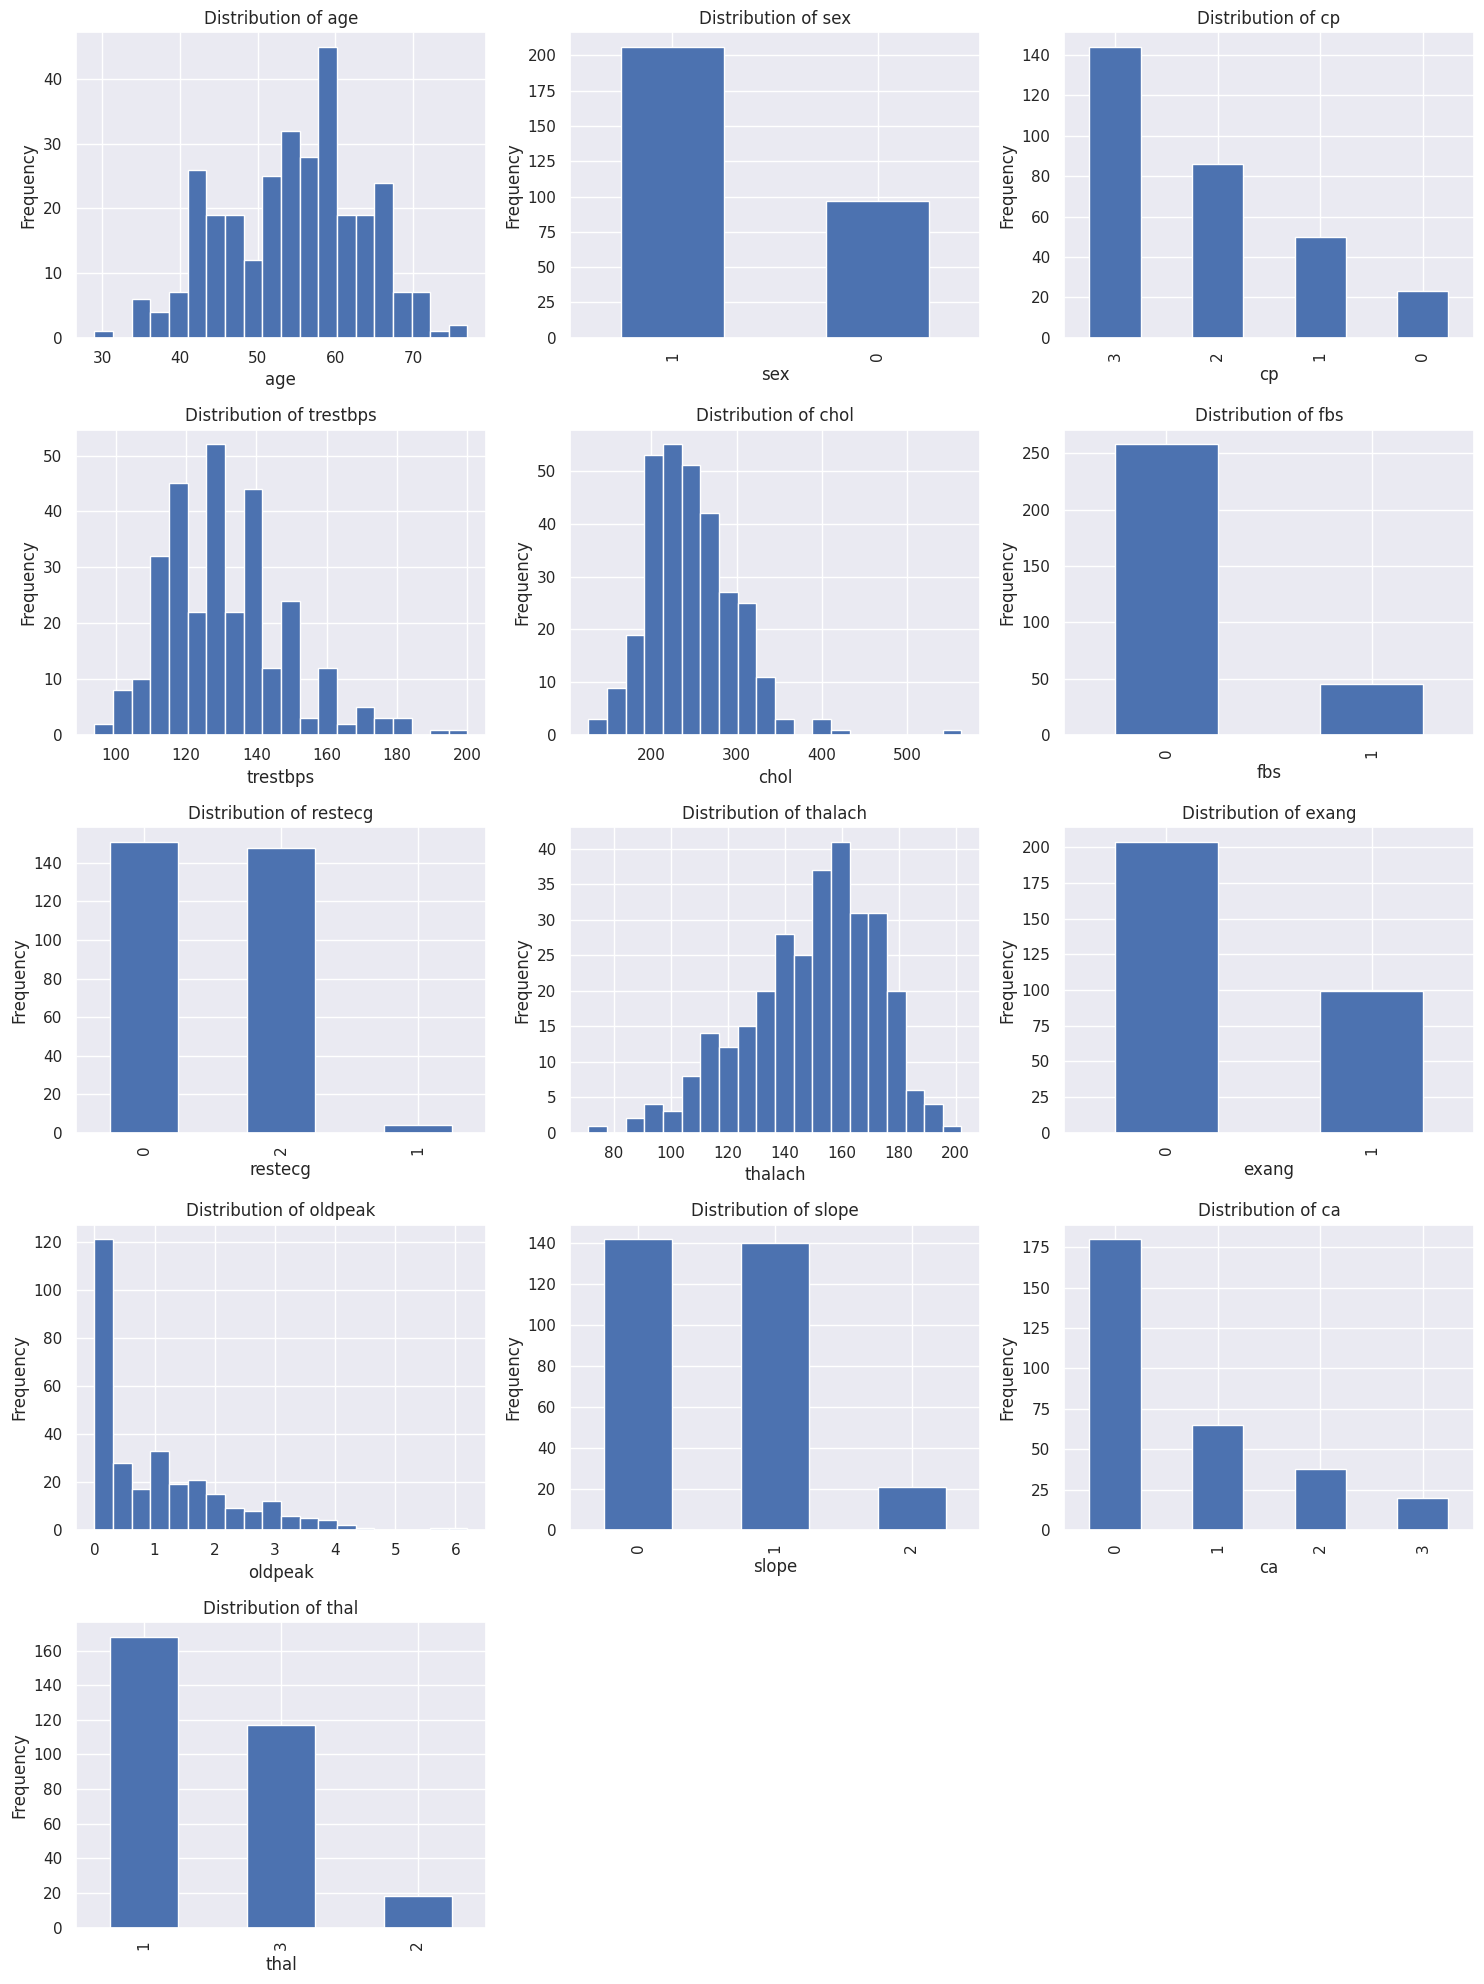

In [82]:
import math # Importing the math module

# Get the number of columns from the original DataFrame 'data'
num_columns = len(data.drop(['target'], axis=1).columns)
cols = 3  # Number of columns in the grid (adjust as needed)
rows = math.ceil(num_columns / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to easily iterate over axes

# Use data.drop(['target'], axis=1) instead of X for column iteration
for i, column in enumerate(data.drop(['target'], axis=1).columns):
    ax = axes[i]
    if data[column].dtype == 'object' or len(data[column].unique()) < 20:
        # For categorical or discrete features, use a bar plot
        data[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        # For continuous features, use a histogram
        data[column].plot(kind='hist', bins=20, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for readability
plt.show()

**Checking Correlation**

<Axes: title={'center': 'Correlation with Diabetes'}>

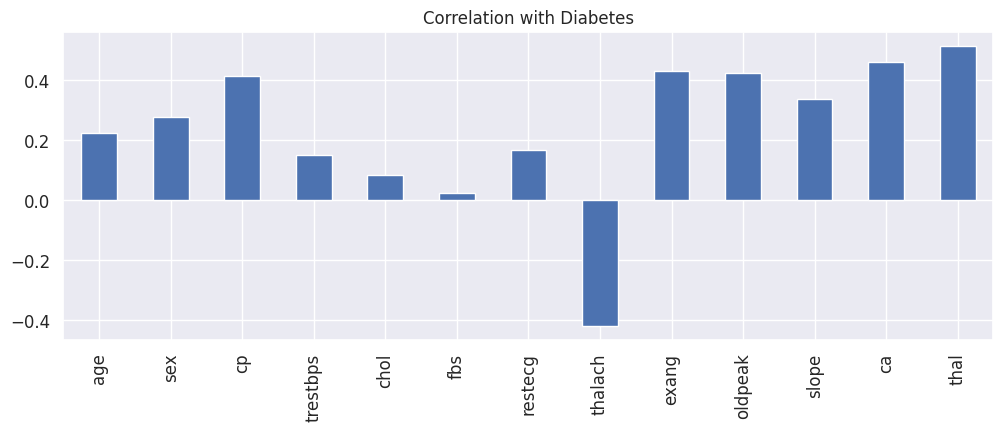

In [83]:
# Now you can use corrwith
X.corrwith(pd.Series(y, index=X.index)).plot.bar(
    figsize=(12, 4), title="Correlation with Diabetes", fontsize=12,
    rot=90, grid=True)

Let's Split the data for Best Performance.

In [84]:
# Split the data into training and test sets exactly as per your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=50)

##**Binarization Of Dataset**

In [85]:
X_binarized = pd.DataFrame(index=X.index)


1. **Age (age)**

Description: Age of the person in years, ranging from 29 to 79.

Thresholds: We'll create age groups based on common age ranges:

Under 40
40-50
50-60
60-70
Over 70

In [86]:
# Calculate minimum and maximum age from the training data
min_age = X_train['age'].min()
max_age = X_train['age'].max()
min_age, max_age

(29, 77)

In [87]:
# Define thresholds exactly as per your code
thresholds = [min_age, 40,50, 60, max_age]

In [88]:
# Binarize age based on thresholds using your code
for threshold in thresholds:
    X_binarized[f'age_le_{threshold}'] = X['age'] <= threshold
    X_binarized[f'age_ge_{threshold}'] = X['age'] >= threshold


2. Sex (sex)
Description:
1: Male
0: Female

In [89]:
X_binarized['male'] = X['sex'] == 1


3. Chest Pain Type (cp)
Description: Chest pain type with values ranging from 0 to 3.

0: Typical Angina
1: Atypical Angina
2: Non-Anginal Pain
3: Asymptomatic

In [90]:
X_binarized['cp_typical_angina'] = X['cp'] == 0
X_binarized['cp_atypical_angina'] = X['cp'] == 1
X_binarized['cp_non_anginal_pain'] = X['cp'] == 2
X_binarized['cp_asymptomatic'] = X['cp'] == 3

# Alternatively, you can group certain types together if needed
X_binarized['cp_angina'] = X['cp'].isin([0, 1])  # Typical and Atypical Angina
X_binarized['cp_non_angina'] = X['cp'].isin([2, 3])  # Non-Anginal Pain and Asymptomatic


4. Resting Blood Pressure (trestbps)
Description: Resting blood pressure in mm Hg.

Processing:

Use thresholds based on the distribution in the training data or standard medical categories.
Binarize based on these thresholds.

In [91]:
# Get minimum and maximum values from training data
min_trestbps = X_train['trestbps'].min()
max_trestbps = X_train['trestbps'].max()
min_trestbps , max_trestbps

(94, 200)

In [92]:
# Define thresholds (you can adjust these thresholds based on your data)
thresholds = [min_trestbps, 120, 140, 160, max_trestbps]

In [93]:
# Binarize trestbps based on thresholds
for threshold in thresholds:
    X_binarized[f'trestbps_le_{threshold}'] = X['trestbps'] <= threshold
    X_binarized[f'trestbps_ge_{threshold}'] = X['trestbps'] >= threshold


5. Serum Cholesterol (chol)
Description: Serum cholesterol in mg/dl.

Processing:

Use thresholds based on medical guidelines or data distribution.
Binarize based on these thresholds.

In [94]:
# Get minimum and maximum values from training data
min_chol = X_train['chol'].min()
max_chol = X_train['chol'].max()
min_chol , max_chol

(131, 417)

In [95]:
# Define thresholds
thresholds = [min_chol, 200, 240, max_chol]

In [96]:
# Binarize chol based on thresholds
for threshold in thresholds:
    X_binarized[f'chol_le_{threshold}'] = X['chol'] <= threshold
    X_binarized[f'chol_ge_{threshold}'] = X['chol'] >= threshold


6. **Fasting Blood Sugar (fbs)**

Description:

0: Fasting blood sugar less than or equal to 120 mg/dl

1: Fasting blood sugar greater than 120 mg/dl

In [97]:
X_binarized['fbs_high'] = X['fbs'] == 1
X_binarized['fbs_normal'] = X['fbs'] == 0


7. Resting Electrocardiographic Results (restecg)
Description:

0: Normal
1: ST-T wave abnormality
2: Left ventricular hypertrophy


In [98]:
X_binarized['restecg_normal'] = X['restecg'] == 0
X_binarized['restecg_stt_abnormality'] = X['restecg'] == 1
X_binarized['restecg_lv_hypertrophy'] = X['restecg'] == 2


8. Maximum Heart Rate Achieved (thalach)

Description: Maximum heart rate achieved.

In [99]:
# Get minimum and maximum values from training data
min_thalach = X_train['thalach'].min()
max_thalach = X_train['thalach'].max()
min_thalach , max_thalach

(71, 202)

In [100]:
# Define thresholds
thresholds = [min_thalach, 100, 150, max_thalach]

In [101]:
# Binarize thalach based on thresholds
for threshold in thresholds:
    X_binarized[f'thalach_le_{threshold}'] = X['thalach'] <= threshold
    X_binarized[f'thalach_ge_{threshold}'] = X['thalach'] >= threshold


9.** Exercise-Induced Angina (exang)**
Description:

0: No

1: Yes

In [102]:
X_binarized['exang'] = X['exang'] == 1
X_binarized['no_exang'] = X['exang'] == 0


10. ST Depression Induced by Exercise (oldpeak)
Description: ST depression induced by exercise relative to rest.



In [103]:
# Get minimum and maximum values from training data
min_oldpeak = X_train['oldpeak'].min()
max_oldpeak = X_train['oldpeak'].max()
min_oldpeak , max_oldpeak

(0.0, 6.2)

In [104]:
# Define thresholds
thresholds = [min_oldpeak, 1.0, 2.0, max_oldpeak]


In [105]:
# Binarize oldpeak based on thresholds
for threshold in thresholds:
    X_binarized[f'oldpeak_le_{threshold}'] = X['oldpeak'] <= threshold
    X_binarized[f'oldpeak_ge_{threshold}'] = X['oldpeak'] >= threshold


11.** Slope of Peak Exercise ST Segment (slope)**

Description:

1: Upsloping

2: Flat

3: Downsloping

In [106]:
X_binarized['slope_upsloping'] = X['slope'] == 1
X_binarized['slope_flat'] = X['slope'] == 2
X_binarized['slope_downsloping'] = X['slope'] == 3


12. Number of Major Vessels Colored by Fluoroscopy (ca)

Description: Number of major vessels (0-3) colored by fluoroscopy.

In [107]:
for value in sorted(X['ca'].unique()):
    X_binarized[f'ca_{value}'] = X['ca'] == value


13**. Thalassemia (thal)**

Description:

1: Normal

2: Fixed defect

3: Reversible defect

0 or missing: Unknown or null

In [108]:
# Replace 0 with NaN for missing values
X['thal'] = X['thal'].replace(0, np.nan)

X_binarized['thal_normal'] = X['thal'] == 1
X_binarized['thal_fixed_defect'] = X['thal'] == 2
X_binarized['thal_reversible_defect'] = X['thal'] == 3
X_binarized['thal_missing'] = X['thal'].isna()


In [109]:
X_binarized = X_binarized.astype(int)


In [110]:
X_binarized.shape

(303, 69)

In [111]:
data_binarized.shape

(303, 70)

After Binarization   we can see how data binarized.

In [112]:
data_binarized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age_le_29                303 non-null    int64
 1   age_ge_29                303 non-null    int64
 2   age_le_40                303 non-null    int64
 3   age_ge_40                303 non-null    int64
 4   age_le_50                303 non-null    int64
 5   age_ge_50                303 non-null    int64
 6   age_le_60                303 non-null    int64
 7   age_ge_60                303 non-null    int64
 8   age_le_77                303 non-null    int64
 9   age_ge_77                303 non-null    int64
 10  male                     303 non-null    int64
 11  cp_typical_angina        303 non-null    int64
 12  cp_atypical_angina       303 non-null    int64
 13  cp_non_anginal_pain      303 non-null    int64
 14  cp_asymptomatic          303 non-null    int64
 15  cp_ang

In [113]:
X_binarized.head().replace({1: 'x', 0: ''})

,age_le_29,age_ge_29,age_le_40,age_ge_40,age_le_50,age_ge_50,age_le_60,age_ge_60,age_le_77,age_ge_77,...,slope_flat,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,thal_missing
0,,x,,x,,x,,x,x,,...,x,,x,,,,,x,,
1,,x,,x,,x,,x,x,,...,,,,,,x,x,,,
2,,x,,x,,x,,x,x,,...,,,,,x,,,,x,
3,,x,x,,x,,x,,x,,...,x,,x,,,,x,,,
4,,x,,x,x,,x,,x,,...,,,x,,,,x,,,


##**Let's split the dataset:**

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, stratify=y, random_state=42)

##**Now using Lazy Classification FCA Method**

In [115]:
class LazyClassifierFCA:
    def __init__(self, max_counter_examples=0, min_cardinality=1):
        self.X_train_positive = None
        self.X_train_negative = None
        self.max_counter_examples = max_counter_examples
        self.min_cardinality = min_cardinality

    def fit(self, X_train, y_train):
        self.X_train_positive = X_train[y_train == 1].reset_index(drop=True)
        self.X_train_negative = X_train[y_train == 0].reset_index(drop=True)

    def classify_sample(self, sample, sample_index=None):
        sample_bool = sample.astype(bool)
        positive_votes = 0
        negative_votes = 0

        # For each positive object in C+
        for _, g_plus in self.X_train_positive.iterrows():
            intersection = sample_bool & g_plus.astype(bool)
            cardinality = intersection.sum()

            if cardinality < self.min_cardinality:
                continue

            # Check if intersection is present in any negative example
            counter_examples = self.X_train_negative[
                (self.X_train_negative & intersection).eq(intersection).all(axis=1)
            ]

            if len(counter_examples) <= self.max_counter_examples:
                positive_votes += 1

        # For each negative object in C-
        for _, g_minus in self.X_train_negative.iterrows():
            intersection = sample_bool & g_minus.astype(bool)
            cardinality = intersection.sum()

            if cardinality < self.min_cardinality:
                continue

            # Check if intersection is present in any positive example
            counter_examples = self.X_train_positive[
                (self.X_train_positive & intersection).eq(intersection).all(axis=1)
            ]

            if len(counter_examples) <= self.max_counter_examples:
                negative_votes += 1

        # Classify based on votes
        if positive_votes > negative_votes:
            prediction = 1
        elif negative_votes > positive_votes:
            prediction = 0
        else:
            prediction = 1  # Default to positive class

        # Debugging output
        if sample_index is not None:
            print(
                f"Sample {sample_index} is classified as {prediction}, "
                f"positive_votes={positive_votes}, negative_votes={negative_votes}"
            )

        return prediction

    def predict(self, X_test):
        return np.array([
            self.classify_sample(sample, sample_index=index)
            for index, sample in X_test.iterrows()
        ])


In [116]:
print(y)

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


In [117]:
len(X_train[y_train == 1]), len(X_train[y_train == 0])

(111, 131)

In [118]:
pos_X_train = X_train[y_train == 1]
neg_X_train = X_train[y_train == 0]
len(pos_X_train), len(neg_X_train)

(111, 131)

In [119]:
# Apply the LazyClassifierFCA
classifier_fca = LazyClassifierFCA(max_counter_examples=0, min_cardinality=1)
classifier_fca.fit(X_train, y_train)
y_pred_fca = classifier_fca.predict(X_test)

Sample 219 is classified as 0, positive_votes=17, negative_votes=80
Sample 271 is classified as 1, positive_votes=72, negative_votes=35
Sample 89 is classified as 0, positive_votes=1, negative_votes=89
Sample 101 is classified as 0, positive_votes=19, negative_votes=80
Sample 67 is classified as 1, positive_votes=79, negative_votes=72
Sample 244 is classified as 0, positive_votes=38, negative_votes=108
Sample 185 is classified as 0, positive_votes=14, negative_votes=66
Sample 233 is classified as 0, positive_votes=53, negative_votes=60
Sample 168 is classified as 1, positive_votes=57, negative_votes=52
Sample 197 is classified as 0, positive_votes=22, negative_votes=92
Sample 137 is classified as 1, positive_votes=82, negative_votes=37
Sample 21 is classified as 0, positive_votes=23, negative_votes=57
Sample 302 is classified as 0, positive_votes=4, negative_votes=88
Sample 187 is classified as 1, positive_votes=55, negative_votes=52
Sample 64 is classified as 1, positive_votes=92, neg

In [120]:
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate metrics
    tnr = tn / (tn + fp) if (tn + fp) else 0
    npv = tn / (tn + fn) if (tn + fn) else 0
    fpr = fp / (fp + tn) if (fp + tn) else 0
    fdr = fp / (fp + tp) if (fp + tp) else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) else 0
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0  # True Positive Rate
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics = {
        'True Positive': tp,
        'True Negative': tn,
        'False Positive': fp,
        'False Negative': fn,
        'True Negative Rate (Specificity)': tnr,
        'Negative Predictive Value': npv,
        'False Positive Rate': fpr,
        'False Discovery Rate': fdr,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (True Positive Rate)': recall,
        'F1 Score': f1
    }

    return metrics


In [121]:
metrics_fca = calculate_metrics(y_test, y_pred_fca)

# Print the metrics
for metric, value in metrics_fca.items():
    print(f"{metric}: {value:.4f}")

True Positive: 26.0000
True Negative: 28.0000
False Positive: 5.0000
False Negative: 2.0000
True Negative Rate (Specificity): 0.8485
Negative Predictive Value: 0.9333
False Positive Rate: 0.1515
False Discovery Rate: 0.1613
Accuracy: 0.8852
Precision: 0.8387
Recall (True Positive Rate): 0.9286
F1 Score: 0.8814


In [122]:
# 7. Apply standard classifiers
# Split data using original features
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_binarized, y, test_size=0.2, stratify=y, random_state=35)

In [123]:
# a. KNN
knn = KNeighborsClassifier()
knn.fit(X_train_orig, y_train_orig)
y_pred_knn = knn.predict(X_test_orig)
metrics_knn = calculate_metrics(y_test_orig, y_pred_knn)

In [124]:
# b. Naive Bayes
nb = GaussianNB()
nb.fit(X_train_orig, y_train_orig)
y_pred_nb = nb.predict(X_test_orig)
metrics_nb = calculate_metrics(y_test_orig, y_pred_nb)

In [125]:
# c. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_orig, y_train_orig)
y_pred_lr = lr.predict(X_test_orig)
metrics_lr = calculate_metrics(y_test_orig, y_pred_lr)

In [126]:
# d. SVM
svm = SVC(probability=True)
svm.fit(X_train_orig, y_train_orig)
y_pred_svm = svm.predict(X_test_orig)
metrics_svm = calculate_metrics(y_test_orig, y_pred_svm)

In [127]:
# e. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_orig, y_train_orig)
y_pred_dt = dt.predict(X_test_orig)
metrics_dt = calculate_metrics(y_test_orig, y_pred_dt)

In [128]:
# f. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_orig, y_train_orig)
y_pred_rf = rf.predict(X_test_orig)
metrics_rf = calculate_metrics(y_test_orig, y_pred_rf)

In [129]:
# g. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_orig, y_train_orig)
y_pred_xgb = xgb.predict(X_test_orig)
metrics_xgb = calculate_metrics(y_test_orig, y_pred_xgb)

In [130]:
# 8. Compile and compare results
classifiers = {
    'LazyClassifierFCA': metrics_fca,
    'KNN': metrics_knn,
    'Naive Bayes': metrics_nb,
    'Logistic Regression': metrics_lr,
    'SVM': metrics_svm,
    'Decision Tree': metrics_dt,
    'Random Forest': metrics_rf,
    'XGBoost': metrics_xgb
}

metrics_data = pd.DataFrame(classifiers).T

In [131]:
# 9. Display the results
print("Classification Metrics Comparison:")
print(metrics_data)

Classification Metrics Comparison:
                     True Positive  True Negative  False Positive  \
LazyClassifierFCA             26.0           28.0             5.0   
KNN                           21.0           32.0             1.0   
Naive Bayes                   21.0           29.0             4.0   
Logistic Regression           22.0           30.0             3.0   
SVM                           22.0           32.0             1.0   
Decision Tree                 21.0           26.0             7.0   
Random Forest                 21.0           29.0             4.0   
XGBoost                       21.0           29.0             4.0   

                     False Negative  True Negative Rate (Specificity)  \
LazyClassifierFCA               2.0                          0.848485   
KNN                             7.0                          0.969697   
Naive Bayes                     7.0                          0.878788   
Logistic Regression             6.0                


In conclusion, LazyClassifierFCA delivered the best overall performance, excelling in recall, F1 score, and accuracy, making it ideal for tasks requiring balanced predictions and minimal false negatives. SVM and KNN demonstrated superior precision and specificity, making them suitable for minimizing false positives, though they sacrificed recall. Random Forest and XGBoost provided balanced but less competitive results, while Logistic Regression offered consistent but average performance across metrics. Decision Tree, however, underperformed significantly across all key metrics, indicating it is not a reliable choice for this dataset.